# Bank Marketing Predictive Analysis

In this project I will be working on a bank marketing dataset containing information of several 
thousands of direct phone marketing, performed by a banking institution in Portugal to offer their new 
bank term deposit product. The original data has more than 45000 with 20 features. I will be working 
on a 20% sample of the dataset with 17 features.

### Analyst & Dataset

**Bora Guzel**

>e-mail: boraguzel01@gmail.com
>
>LinkedIn: https://www.linkedin.com/in/boraguzel/
>
>GitHub: https://github.com/boraguzel
>
>Tableau: https://public.tableau.com/app/profile/bora.guzel

---

Dataset: 20% sample of the **Bank Marketing Dataset

Link: https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing



# Project

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
from datetime import datetime as dt
from sklearn.model_selection import cross_val_score,KFold,LeaveOneOut
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the dataset
df = pd.read_csv("bank-sampled-9K.csv",index_col=0)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
11,29,admin.,single,secondary,no,390,yes,no,unknown,5,may,137,1,-1,0,unknown,no
12,53,technician,married,secondary,no,6,yes,no,unknown,5,may,517,1,-1,0,unknown,no
17,57,blue-collar,married,primary,no,52,yes,no,unknown,5,may,38,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes


In [3]:
# Check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 0 to 45207
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


# Data Exploration and Preprocessing

In [4]:
#Drop the 'duration' column and process date-related features
df.drop("duration", axis=1, inplace=True)

last_date = "18 Nov, 2010"
dt_1 = dt.strptime(last_date, "%d %b, %Y")

df["month"] = df["month"].apply(lambda x: x.capitalize())
df["date"] = df['day'].astype(str)+ " " + df['month'] + ", 2010"

df["last_contact"] = df['date'].apply(lambda x: (dt_1 - dt.strptime(x, "%d %b, %Y")).days)

df.drop(columns=['day','date','month'], axis=1, inplace=True)

In [5]:
#checking how the dataframe looks so far
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y,last_contact
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,0,unknown,no,197
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,0,unknown,no,197
11,29,admin.,single,secondary,no,390,yes,no,unknown,1,-1,0,unknown,no,197
12,53,technician,married,secondary,no,6,yes,no,unknown,1,-1,0,unknown,no,197
17,57,blue-collar,married,primary,no,52,yes,no,unknown,1,-1,0,unknown,no,197


In [6]:
# Summary Statistics
df.describe()

,age,balance,campaign,pdays,previous,last_contact
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,41.035667,1372.970222,2.767667,39.906444,0.609556,150.289000
std,10.561698,3363.690197,3.011022,99.440498,3.499115,74.721977
min,18.000000,-4057.000000,1.000000,-1.000000,0.000000,-42.000000
25%,33.000000,68.000000,1.000000,-1.000000,0.000000,104.000000
50%,39.000000,450.000000,2.000000,-1.000000,0.000000,166.000000
75%,48.000000,1453.250000,3.000000,-1.000000,0.000000,193.000000
max,90.000000,102127.000000,51.000000,831.000000,275.000000,316.000000


## Creation of Dummy Variables

In [7]:
df = pd.get_dummies(df, drop_first=True)

In [8]:
#replacing any appearance of hypen ‘-‘ with underscore ‘_’ 
df.rename(columns=lambda s: s.replace("-", "_"), inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 0 to 45207
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  9000 non-null   int64
 1   balance              9000 non-null   int64
 2   campaign             9000 non-null   int64
 3   pdays                9000 non-null   int64
 4   previous             9000 non-null   int64
 5   last_contact         9000 non-null   int64
 6   job_blue_collar      9000 non-null   uint8
 7   job_entrepreneur     9000 non-null   uint8
 8   job_housemaid        9000 non-null   uint8
 9   job_management       9000 non-null   uint8
 10  job_retired          9000 non-null   uint8
 11  job_self_employed    9000 non-null   uint8
 12  job_services         9000 non-null   uint8
 13  job_student          9000 non-null   uint8
 14  job_technician       9000 non-null   uint8
 15  job_unemployed       9000 non-null   uint8
 16  job_unknown          90

## Feature Selection and Scaling

In [10]:
# Divide dataset by features and target
df = df.reset_index(drop=True)
X = df.drop("y_yes", axis=1)
Y = df.y_yes

### FS with Logistic Regression

In [13]:
from sklearn.feature_selection import SelectFromModel
# Feature Selection using Logistic Regression
selector_LogReg = SelectFromModel(estimator=LogisticRegression(max_iter=5000)).fit(X, Y)
selected_features_logreg = X.columns[selector_LogReg.get_support()]

In [14]:
# Selected Features by Linear SVM
selector_LogReg.get_support()

array([False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False,  True,
       False,  True,  True])

In [15]:
selector_LogReg.get_support().sum()

7

In [16]:
X.columns[selector_LogReg.get_support()]

Index(['job_housemaid', 'job_retired', 'housing_yes', 'loan_yes',
       'contact_unknown', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

### FS with LinearSVM

In [19]:
from sklearn.svm import LinearSVC, SVC
selector_SVM = SelectFromModel(estimator=LinearSVC(max_iter=5000, C=0.001))
selector_SVM.fit(X,Y)
svm=selector_SVM.fit(X,Y)

In [20]:
svm.get_support()

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True,  True, False,  True,
       False,  True,  True])

In [21]:
svm.get_support().sum()

7

In [22]:
X.columns[svm.get_support()]

Index(['job_retired', 'marital_married', 'housing_yes', 'loan_yes',
       'contact_unknown', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

### FS with K-Best 

In [23]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [24]:
#k=10 for desired 10 features
select10 = SelectKBest(mutual_info_classif, k=10)
select10.fit(X,Y)
select10_cols=select10.fit(X,Y)
X.columns[select10_cols.get_support()]

Index(['age', 'balance', 'pdays', 'previous', 'last_contact',
       'job_entrepreneur', 'housing_yes', 'contact_unknown',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

### Milestone

Logistic Regression and Linear SVM gave 7 features while K-Best gave 10 (it's pre-defined).By looking at the selected features from these models, Linear SVM makes more sense. These features selected by Linear SVM are: -['job_retired', 'marital_married', 'housing_yes', 'loan_yes', 'contact_unknown', 'poutcome_success', 'poutcome_unknown']

# Compare Models

In [25]:
# duplicate the original df just in case
o = df

In [26]:
# create the new dataframe for the selected features with y_yes included 
df = df[['job_retired', 'marital_married', 'housing_yes', 'loan_yes',
       'contact_unknown', 'poutcome_success', 'poutcome_unknown','y_yes']]
df

,job_retired,marital_married,housing_yes,loan_yes,contact_unknown,poutcome_success,poutcome_unknown,y_yes
0,0,1,1,0,1,0,1,0
1,0,1,1,1,1,0,1,0
2,0,0,1,0,1,0,1,0
3,0,1,1,0,1,0,1,0
4,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
8995,0,0,1,0,0,0,0,0
8996,0,1,0,0,0,1,0,1
8997,1,1,0,0,0,0,0,1
8998,0,1,0,0,0,0,1,1


In [27]:
# Divide the independent&dependent variables
X=df.drop("y_yes", axis=1)
y = df.y_yes
X.shape

(9000, 7)

In [28]:
rb = RobustScaler()
Robust = rb.fit_transform(X)

X_rb = pd.DataFrame(Robust, index=X.index, 
                          columns=X.columns) 
X_rb = X_rb.reset_index(drop=True)
X_rb.shape
#X_rb new data frame after scaling


(9000, 7)

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score,KFold,LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
#pip install xgboost
import xgboost as xgb
from sklearn.metrics import classification_report

In [30]:
#Dividing the dataset into training and test sets with ratio of 75:25
xtrain, xtest,ytrain,ytest = train_test_split(X_rb, y, test_size=0.25,
                                                   random_state=42)

In [31]:
names = ["Nearest Neighbors",          
         "Decision Tree", "Naive Bayes","RandomForest","AdaBoost","XGBOOST"]
scores = [] #list variable to hold classification scores
cv_score = [] 
kfold = KFold(n_splits=5)

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    GaussianNB(),
    RandomForestClassifier(max_depth=5, n_estimators=300),
    AdaBoostClassifier(learning_rate=0.1),
    xgb.XGBClassifier()]



In [32]:
for classifier in classifiers:
    pipeline = Pipeline(steps=[('classifier', classifier)
    ])
    pipeline.fit(xtrain, ytrain)
    names.append(pipeline.__class__.__name__)
    model_cv_scores = cross_val_score(classifier, xtrain, ytrain, cv = kfold)
    cv_score.append(model_cv_scores.mean())
    print(classifier)
    scores.append(pipeline.score(xtest, ytest))
    print("model score: %.3f" % pipeline.score(xtest, ytest))
    print("\n ---------------------------------")

scores_df = pd.DataFrame(zip(names,cv_score,scores), columns = ['Classifier', 'Cross Val. Score (Avg)', 'Accuracy Score'])
scores_df

KNeighborsClassifier(n_neighbors=3)
model score: 0.893

 ---------------------------------
DecisionTreeClassifier(max_depth=5)
model score: 0.896

 ---------------------------------
GaussianNB()
model score: 0.874

 ---------------------------------
RandomForestClassifier(max_depth=5, n_estimators=300)
model score: 0.896

 ---------------------------------
AdaBoostClassifier(learning_rate=0.1)
model score: 0.897

 ---------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=No

,Classifier,Cross Val. Score (Avg),Accuracy Score
0,Nearest Neighbors,0.890815,0.893333
1,Decision Tree,0.894667,0.896000
2,Naive Bayes,0.873481,0.874222
3,RandomForest,0.894963,0.896000
4,AdaBoost,0.894519,0.896889
5,XGBOOST,0.894667,0.896000


AdaBoost is the superior model in this case

 ### Model Evaluation

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [42]:
model = AdaBoostClassifier(learning_rate=0.1)
model.fit(xtrain,ytrain)
y_pred = model.predict(xtest)

data = confusion_matrix(ytest,y_pred)


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

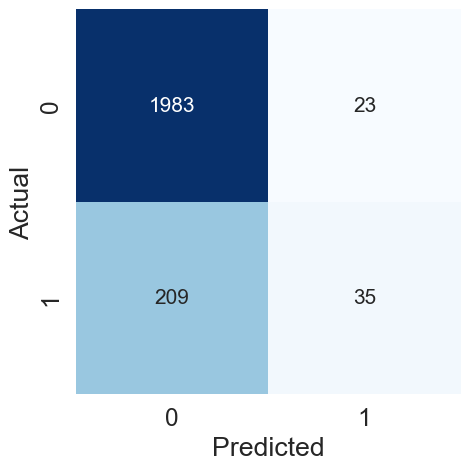

In [43]:
df_cm = pd.DataFrame(data, columns=np.unique(ytest), index = np.unique(ytest))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1.6)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 15}, cbar=False,
vmax=500, square=True, fmt="d", cmap="Blues")

### Classification Report

In [44]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2006
           1       0.60      0.14      0.23       244

    accuracy                           0.90      2250
   macro avg       0.75      0.57      0.59      2250
weighted avg       0.87      0.90      0.87      2250



### ROC Curve

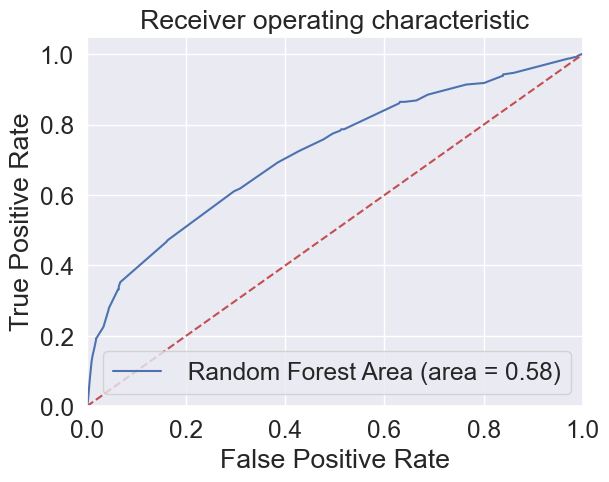

Area Under ROC 0.576289573901247


In [45]:
RFF = roc_auc_score(ytest, pipeline.predict(xtest))
fpr, tpr, thresholds = roc_curve(ytest, pipeline.predict_proba(xtest)[:,1])
plt.figure()
plt.plot(fpr, tpr, label=' Random Forest Area (area = %0.2f)' % RFF)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print("Area Under ROC", RFF)

In [47]:
print(Y.value_counts())

0    7969
1    1031
Name: y_yes, dtype: int64


# Conclusion

The classification report for the AdaBoost Classifier indicates that the model has an overall accuracy of 90%, which suggests that it correctly predicts the class labels for the majority of instances. However, when we look at precision and recall, we see a significant imbalance between the two classes (0 and 1). The model performs well in predicting class 0 with a precision of 90% and recall of 99%, indicating that it effectively identifies true negatives and has a high true negative rate. In contrast, for class 1, the precision is only 60%, indicating that when the model predicts class 1, it has a moderate level of false positives, and the recall is quite low at 14%, indicating that it misses a significant number of actual class 1 instances. This imbalance is reflected in the F1-score, which is higher for class 0 (0.94) compared to class 1 (0.23). The confusion matrix further illustrates this imbalance, with a large number of true negatives (1983) and a small number of true positives (35) for class 1. Lastly, the Area Under ROC (Receiver Operating Characteristic) is 0.576, which indicates that the model's ability to distinguish between the two classes is only slightly better than random chance. This suggests that the model might benefit from further tuning or addressing class imbalance issues to improve its performance on class 1 predictions.

### References


Gong, D. (2022, July 12). Top 6 machine learning algorithms for classification. Medium. https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501 
Hands-on machine learning with scikit-learn, Keras, and TensorFlow, 2nd edition. (n.d.). O’Reilly Online Learning. https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/ 